In [1]:
import pandas as pd
import numpy as np

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Warnings
import warnings
warnings.filterwarnings('ignore')
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [4]:
print(f"Shape: {df.shape}")

Shape: (891, 12)


In [5]:
# Count missing values
missing_count = df.isnull().sum()
print("Missing Values Count:")
print(missing_count[missing_count > 0])
# Calculate missing percentage
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
'Column': missing_percent.index,
'Missing_Count': df.isnull().sum().values,
'Missing_Percent': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)
print("\nMissing Values Summary:")
print(missing_df)

Missing Values Count:
Age         177
Cabin       687
Embarked      2
dtype: int64

Missing Values Summary:
      Column  Missing_Count  Missing_Percent
10     Cabin            687        77.104377
5        Age            177        19.865320
11  Embarked              2         0.224467


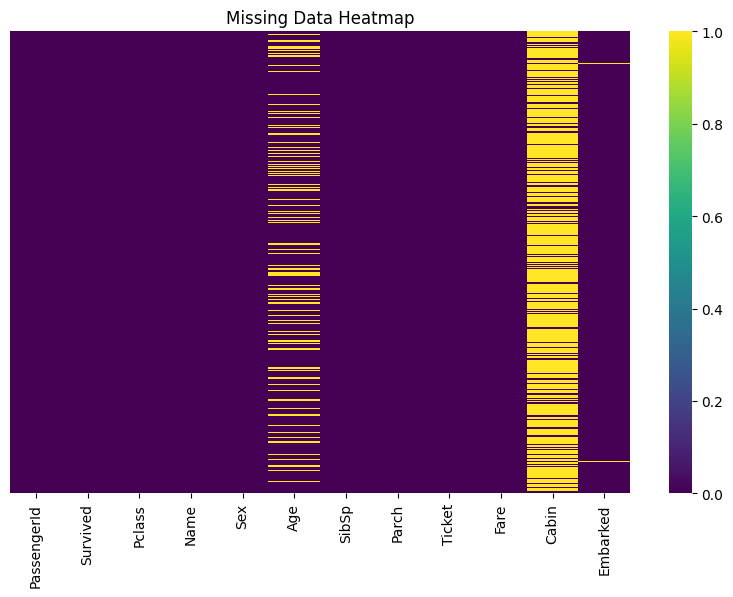

<Figure size 1000x600 with 0 Axes>

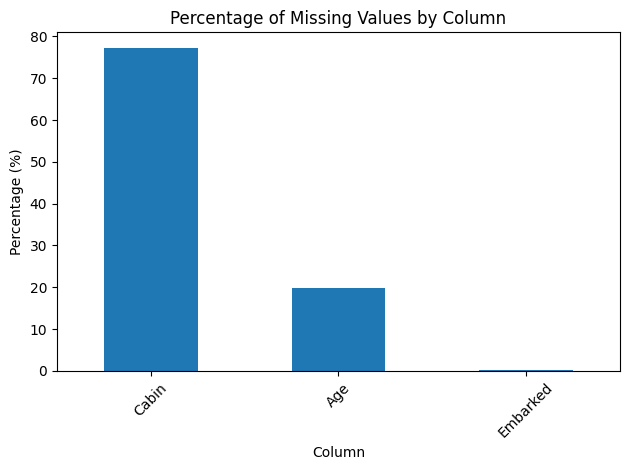

In [6]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()
# Bar plot of missing values
plt.figure(figsize=(10, 6))
missing_df.plot(x='Column', y='Missing_Percent', kind='bar', legend=False)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Check which rows have missing values
print("Rows with missing Embarked:")
print(df[df['Embarked'].isnull()])

Rows with missing Embarked:
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [8]:
df = df.dropna(subset=['Embarked', 'Fare'])

In [9]:
# Verify
print(f"\nDataset shape after dropping: {df.shape}")
print(f"Missing Embarked: {df['Embarked'].isnull().sum()}")


Dataset shape after dropping: (889, 12)
Missing Embarked: 0


In [10]:
# Check impact on survival rate
original_survival_rate = 0.383 # Known Titanic survival rate from EDA
current_survival_rate = df['Survived'].mean()
print(f"\nOriginal dataset: 891 rows")
print(f"After dropping: {len(df)} rows")
print(f"Rows lost: {891 - len(df)} ({((891 - len(df))/891)*100:.2f}%)")
print(f"Survival rate: {current_survival_rate:.3f}")


Original dataset: 891 rows
After dropping: 889 rows
Rows lost: 2 (0.22%)
Survival rate: 0.382


In [11]:
# Extract title from name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Check titles
print("Title value counts:")
print(df['Title'].value_counts())
# Group rare titles
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
# Fill age based on Title median
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'), inplace=True)
# If still missing, use overall median
df['Age'].fillna(df['Age'].median(), inplace=True)
print(f"\nMissing values after title-based imputation: {df['Age'].isnull().sum()}")

Title value counts:
Title
Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Missing values after title-based imputation: 0


the title (such as Mr, Mrs, Miss) provides meaningful information related to a passenger’s age.

In [12]:
# Create binary feature: has cabin info or not
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
# Drop original Cabin
df = df.drop('Cabin', axis=1)
print("Cabin converted to Has_Cabin binary feature")

Cabin converted to Has_Cabin binary feature


i think it is simplest related to missing count value(77%)

In [13]:
# Final missing value check
print("Final Missing Values Check:")
print(df.isnull().sum())
# Assert no missing values
assert df.isnull().sum().sum() == 0, "There are still missing values!"
print("\n✓ All missing values handled successfully!")

Final Missing Values Check:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Has_Cabin      0
dtype: int64

✓ All missing values handled successfully!


In [15]:
# Check current data types
print("Current data types:")
print(df.dtypes)
# Optimize integer types
df['PassengerId'] = df['PassengerId'].astype('int32')
df['Survived'] = df['Survived'].astype('int8')
df['Pclass'] = df['Pclass'].astype('int8')
df['SibSp'] = df['SibSp'].astype('int8')
df['Parch'] = df['Parch'].astype('int8')
# Convert to category (saves memory)
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
if 'Deck' in df.columns:
 df['Deck'] = df['Deck'].astype('category')
if 'Title' in df.columns:
 df['Title'] = df['Title'].astype('category')
# Optimize float types
df['Age'] = df['Age'].astype('float32')
df['Fare'] = df['Fare'].astype('float32')
print("\nOptimized data types:")
print(df.dtypes)
# Check memory savings
print("\nMemory usage comparison:")
print(f"Original: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

Current data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title           object
Has_Cabin        int64
dtype: object

Optimized data types:
PassengerId       int32
Survived           int8
Pclass             int8
Name             object
Sex            category
Age             float32
SibSp              int8
Parch              int8
Ticket           object
Fare            float32
Embarked       category
Title          category
Has_Cabin         int64
dtype: object

Memory usage comparison:
Original: 145.62 KB


Age outlier bounds: [0.00, 56.00]
Number of age outliers: 34


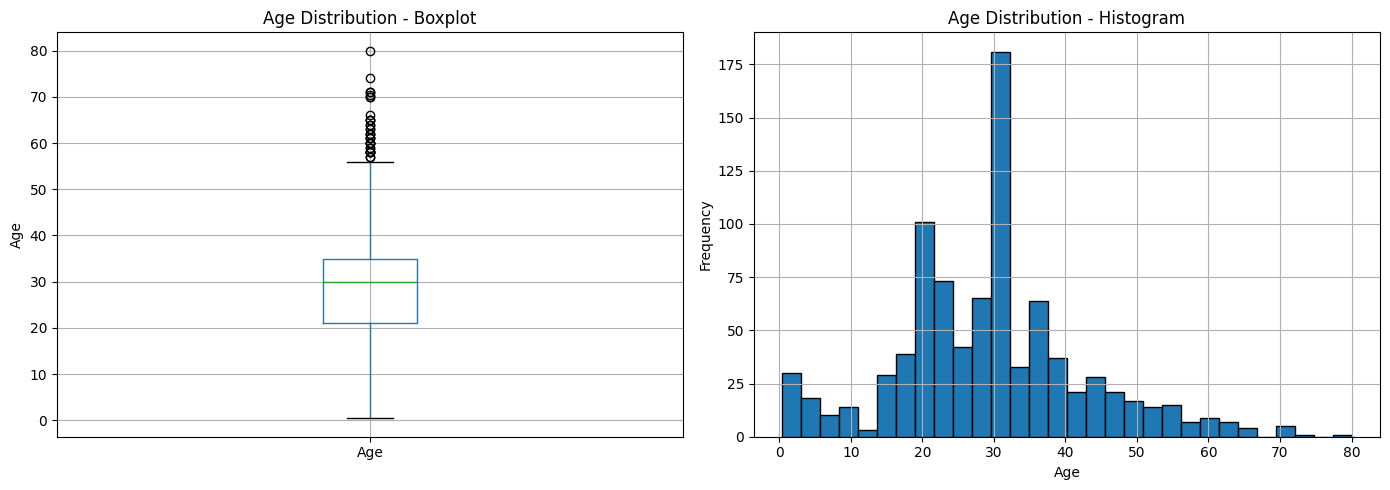

In [16]:
# Statistical method: IQR
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
print(f"Age outlier bounds: [{lower_bound_age:.2f}, {upper_bound_age:.2f}]")
# Find outliers
age_outliers = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]
print(f"Number of age outliers: {len(age_outliers)}")
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Boxplot
df.boxplot(column='Age', ax=axes[0])
axes[0].set_title('Age Distribution - Boxplot')
axes[0].set_ylabel('Age')
# Histogram
df['Age'].hist(bins=30, ax=axes[1], edgecolor='black')
axes[1].set_title('Age Distribution - Histogram')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

no outliers

Fare outlier bounds: [-26.76, 65.66]
Number of fare outliers: 114
Max fare: $512.33


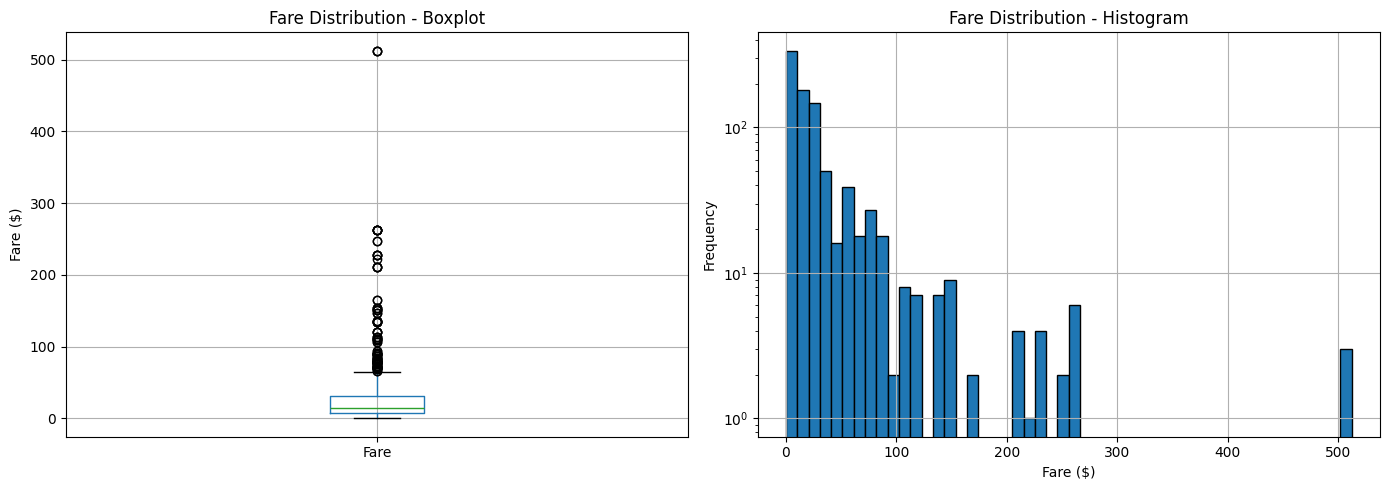

In [17]:
# Statistical method: IQR
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare
print(f"Fare outlier bounds: [{lower_bound_fare:.2f}, {upper_bound_fare:.2f}]")
# Find outliers
fare_outliers = df[(df['Fare'] < lower_bound_fare) | (df['Fare'] > upper_bound_fare)]
print(f"Number of fare outliers: {len(fare_outliers)}")
print(f"Max fare: ${df['Fare'].max():.2f}")
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Boxplot
df.boxplot(column='Fare', ax=axes[0])
axes[0].set_title('Fare Distribution - Boxplot')
axes[0].set_ylabel('Fare ($)')
# Histogram (log scale)
df['Fare'].hist(bins=50, ax=axes[1], edgecolor='black')
axes[1].set_title('Fare Distribution - Histogram')
axes[1].set_xlabel('Fare ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')
plt.tight_layout()
plt.show()

The Fare distribution contains several outliers

In [18]:
from sklearn.preprocessing import LabelEncoder
# Create label encoder
le = LabelEncoder()
# Encode Sex (male=1, female=0)
df['Sex_encoded'] = le.fit_transform(df['Sex'])
print("Sex encoding:")
print(df[['Sex', 'Sex_encoded']].drop_duplicates())
# Manually encode for clarity (optional but recommended)
df['Sex_binary'] = df['Sex'].map({'male': 1, 'female': 0})

Sex encoding:
      Sex  Sex_encoded
0    male            1
1  female            0


In [19]:
# One-hot encode Embarked
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df = pd.concat([df, embarked_encoded], axis=1)
print("Embarked columns after encoding:")
print(embarked_encoded.head())
# One-hot encode Pclass (optional, can keep as numeric)
pclass_encoded = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=False)
df = pd.concat([df, pclass_encoded], axis=1)
# One-hot encode Title
title_encoded = pd.get_dummies(df['Title'], prefix='Title', drop_first=True)
df = pd.concat([df, title_encoded], axis=1)
print("\nNew encoded columns:")
print(df.columns.tolist())

Embarked columns after encoding:
   Embarked_Q  Embarked_S
0       False        True
1       False       False
2       False        True
3       False        True
4       False        True

New encoded columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Has_Cabin', 'Sex_encoded', 'Sex_binary', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']


In [22]:
# If you have age groups or fare groups, encode them
if 'AgeGroup' in df.columns:
    age_group_mapping = {'Child':0,'Teenager':1,'Adult':2,'Middle-Aged':3,'Senior':4}
    df['AgeGroup_encoded'] = df['AgeGroup'].map(age_group_mapping)

if 'FareGroup' in df.columns:
    fare_group_mapping = {'Low':0,'Medium':1,'High':2,'Very High':3}
    df['FareGroup_encoded'] = df['FareGroup'].map(fare_group_mapping)

print("Ordinal encoding completed")


Ordinal encoding completed


In [28]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[numeric_features])

scaled_df = pd.DataFrame(
    scaled_data,
    columns=[f'{col}_scaled' for col in numeric_features]
)

df = pd.concat([df, scaled_df], axis=1)

print(df[['Age', 'Age_scaled', 'Fare', 'Fare_scaled']].head())


    Age  Age_scaled       Fare  Fare_scaled
0  22.0   -0.555365   7.250000    -0.500240
1  38.0    0.654237  71.283302     0.788947
2  26.0   -0.252964   7.925000    -0.486650
3  35.0    0.427436  53.099998     0.422861
4  35.0    0.427436   8.050000    -0.484133


In [30]:
from sklearn.preprocessing import MinMaxScaler
# Create scaler
minmax_scaler = MinMaxScaler()
# Scale features
for feature in numeric_features:
 df[f'{feature}_normalized'] = minmax_scaler.fit_transform(df[[feature]])
print("Features normalized using MinMaxScaler")
print("\nComparison:")
print(df[['Fare', 'Fare_scaled', 'Fare_normalized']].describe())


Features normalized using MinMaxScaler

Comparison:
             Fare  Fare_scaled  Fare_normalized
count  889.000000   889.000000       889.000000
mean    32.096680     0.000000         0.062649
std     49.697487     1.000563         0.097003
min      0.000000    -0.646204         0.000000
25%      7.895800    -0.487238         0.015412
50%     14.454200    -0.355197         0.028213
75%     31.000000    -0.022080         0.060508
max    512.329224     9.668551         1.000000


In [31]:
# Columns to drop (not useful for ML)
columns_to_drop = [
'PassengerId', # Just an ID
'Name', # Already extracted title
'Ticket', # No clear pattern
'Cabin', # Already processed
]
# Drop if they exist
df_clean = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)
print("Columns dropped:")
print([col for col in columns_to_drop if col in df.columns])
print(f"\nRemaining columns: {len(df_clean.columns)}")
print(df_clean.columns.tolist())

Columns dropped:
['PassengerId', 'Name', 'Ticket']

Remaining columns: 29
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Has_Cabin', 'Sex_encoded', 'Sex_binary', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Age_scaled', 'Fare_scaled', 'SibSp_scaled', 'Parch_scaled', 'Age_normalized', 'Fare_normalized', 'SibSp_normalized', 'Parch_normalized']


In [38]:

print("="*60)
print("FINAL DATA QUALITY REPORT")
print("="*60)
# 1. Check shape
print(f"\n1. Dataset Shape: {df_clean.shape}")
print(f" - Rows: {df_clean.shape[0]}")
print(f" - Columns: {df_clean.shape[1]}")
# 2. Missing values
print(f"\n2. Missing Values: {df_clean.isnull().sum().sum()}")

if df_clean.isnull().sum().sum() > 0:
    print(" Warning: Still has missing values!")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])
else:
    print(" ✓ No missing values")

# 3. Data types
print(f"\n3. Data Types:")
print(df_clean.dtypes.value_counts())
# 4. Duplicates
duplicates = df_clean.duplicated().sum()
print(f"\n4. Duplicate Rows: {duplicates}")

if duplicates > 0:
    print(" Warning: Dataset has duplicates!")
else:
    print(" ✓ No duplicates")

# 5. Target variable distribution
print(f"\n5. Target Variable (Survived):")
print(df_clean['Survived'].value_counts())
print(f" Survival Rate: {df_clean['Survived'].mean()*100:.2f}%")
# 6. Numeric features summary
print(f"\n6. Numeric Features Summary:")
print(df_clean.describe().T)
# 7. Memory usage
print(f"\n7. Memory Usage:")
print(f" Total: {df_clean.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\n" + "="*60)
print("DATA CLEANING AND PREPROCESSING COMPLETE!")
print("="*60)

FINAL DATA QUALITY REPORT

1. Dataset Shape: (891, 29)
 - Rows: 891
 - Columns: 29

2. Missing Values: 58
Survived            2
Pclass              2
Sex                 2
Age                 2
SibSp               2
Parch               2
Fare                2
Embarked            2
Title               2
Has_Cabin           2
Sex_encoded         2
Sex_binary          2
Embarked_Q          2
Embarked_S          2
Pclass_1            2
Pclass_2            2
Pclass_3            2
Title_Miss          2
Title_Mr            2
Title_Mrs           2
Title_Rare          2
Age_scaled          2
Fare_scaled         2
SibSp_scaled        2
Parch_scaled        2
Age_normalized      2
Fare_normalized     2
SibSp_normalized    2
Parch_normalized    2
dtype: int64

3. Data Types:
object      9
float32     8
float64     8
category    1
category    1
category    1
category    1
Name: count, dtype: int64

4. Duplicate Rows: 3

5. Target Variable (Survived):
Survived
0.0    549
1.0    340
Name: count, dtype